# Plots for Paper

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\APPS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [3]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## Weighting

In [5]:
# import data for weights
weights = pd.read_excel("results/weighting.xlsx", index_col=0)
weights

,Reflection of Usage-Related Costs,Reflection of Capacity-Related Costs,Fairness and Customer Acceptance,Expansion of DER,Efficient Electricity Usage
Stakeholder,,,,,
DSO,0.130899,0.654493,0.148815,0.032897,0.032897
Authority,0.546438,0.182146,0.162579,0.021767,0.087069
Regulator,0.099483,0.696380,0.121149,0.041494,0.041494
Politics,0.075758,0.015152,0.454545,0.340909,0.113636
Third Party,0.378788,0.075758,0.090909,0.113636,0.340909


In [6]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [7]:
tmp = sns.color_palette("Paired")
colors = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]

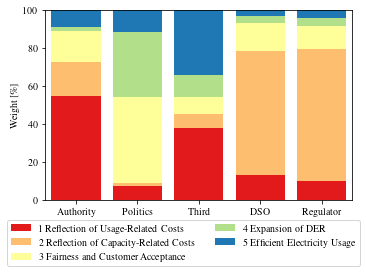

In [38]:
ax = weights.multiply(100).loc[["Authority", "Politics", "Third", "DSO", "Regulator"]].plot.bar(
    stacked=True, color=colors, figsize=(5.5,3.5))#
change_width(ax, 0.8)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0,100)
ax.set_ylabel("Weight [\%]")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.45,-0.37))
plt.savefig('results/plots/weights.pdf', bbox_inches='tight')

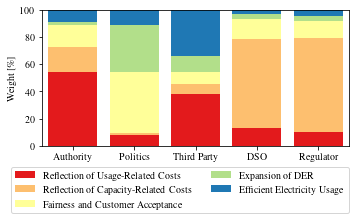

In [9]:
ax = weights.multiply(100).loc[["Authority", "Politics", "Third Party", "DSO", "Regulator"]].plot.bar(
    stacked=True, color=colors, figsize=(5.5,2.5))#
change_width(ax, 0.8)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(0,100)
ax.set_ylabel("Weight [\%]")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.45,-0.53))
plt.savefig('results/plots/weights.pdf', bbox_inches='tight')

## Level of Fulfillment

In [12]:
results = pd.read_excel("results/resultmatrix.xlsx", index_col=0)
results

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff,Criteria,Scenario
Reflection of Usage-Related Costs,0.253731,0.246500,0.249405,0.250364,Reflection of Usage-Related Costs,1
Reflection of Capacity-Related Costs,0.241522,0.250219,0.253516,0.254743,Reflection of Capacity-Related Costs,1
Fairness and Customer Acceptance,0.241876,0.256807,0.251086,0.250231,Fairness and Customer Acceptance,1
Expansion of DER,0.277802,0.241182,0.239374,0.241643,Expansion of DER,1
Efficient Electricity Usage,0.256339,0.245679,0.248360,0.249621,Efficient Electricity Usage,1
Reflection of Usage-Related Costs,0.266140,0.239103,0.245315,0.249442,Reflection of Usage-Related Costs,2
Reflection of Capacity-Related Costs,0.233892,0.247833,0.257016,0.261259,Reflection of Capacity-Related Costs,2
Fairness and Customer Acceptance,0.223384,0.272627,0.254756,0.249233,Fairness and Customer Acceptance,2
Expansion of DER,0.260951,0.251461,0.245154,0.242434,Expansion of DER,2
Efficient Electricity Usage,0.267516,0.238545,0.244768,0.249172,Efficient Electricity Usage,2


In [15]:
tariffs = ['Volumetric Tariff', 'Monthly Power Peak', 'Yearly Power Peak', 'Capacity Tariff']

In [19]:
scenarios = [1, 2, 3, 4]
scenario_names = {
    1: "Scenario 1: High Inflexibility",
    2: "Scenario 2: Increase in Peak-Consumption",
    3: "Scenario 3: Increase in Local Production", 
    4: "Scenario 4: High Flexibility"
}

In [17]:
criteria_translation = {
    "Reflection of Usage-Related Costs": 'Reflection\nof Usage-\nRelated Costs',
    "Reflection of Capacity-Related Costs": 'Reflection\nof Capacity-\nRelated Costs',
    "Fairness and Customer Acceptance": 'Fairness and\nCustomer\nAcceptance',
    "Expansion of DER": 'Expansion\nof DER', 
    "Efficient Electricity Usage": 'Efficient\nElectricity\nUsage'}

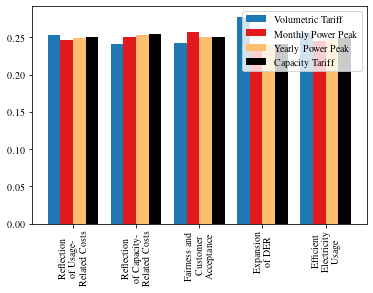

In [18]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[5], tmp[6], "k"]
plot_df = results.loc[results["Scenario"]==1][tariffs].rename(index=criteria_translation)
ax=plot_df.plot.bar(color=colors, width=0.8)

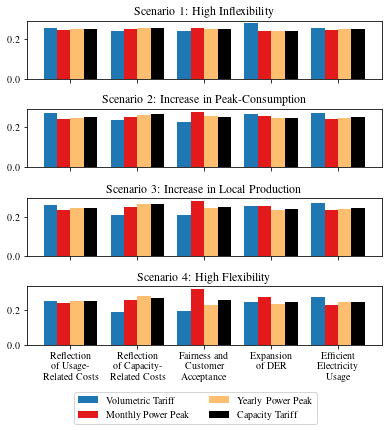

In [20]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[5], tmp[6], "k"]
fig, axes = plt.subplots(4, figsize=(5.5, 5.5))
for idx, ax in enumerate(axes):
    plot_df = results.loc[results["Scenario"]==scenarios[idx]][tariffs].rename(index=criteria_translation)
    plot_df.plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.45))
plt.savefig('results/plots/fulfillment.pdf', bbox_inches='tight')

In [22]:
scenario_names_reduced = {
    1: "Scenario 1: Low Flexibility",
    4: "Scenario 2: High Flexibility"
}

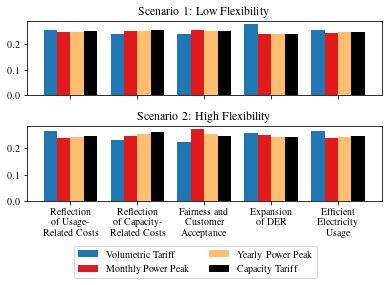

In [23]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[5], tmp[6], "k"]
fig, axes = plt.subplots(2, figsize=(5.5, 3.5))
for idx, scenario in enumerate([1, 4]):
    ax=axes[idx]
    plot_df = results.loc[results["Scenario"]==scenarios[idx]][tariffs].rename(index=criteria_translation)
    plot_df.plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names_reduced[scenario])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.1))
plt.savefig('results/plots/fulfillment_reduced.pdf', bbox_inches='tight')

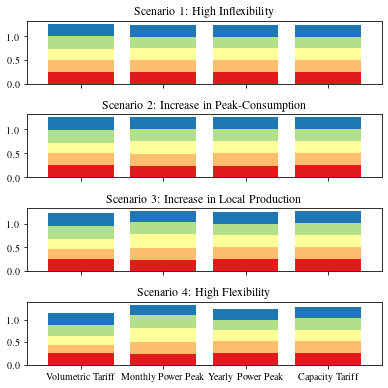

In [24]:
tmp = sns.color_palette("Paired")
colors = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
fig, axes = plt.subplots(4, figsize=(5.5, 5.5))
for idx, ax in enumerate(axes):
    plot_df = results.loc[results["Scenario"]==scenarios[idx]][tariffs].rename(index=criteria_translation)
    plot_df.T.plot.bar(color=colors, width=0.8, ax=ax, stacked=True)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
plt.tight_layout()

## Overall Ranking

In [25]:
scenario_names = {
    'Scenario 1': "Scenario 1: High Inflexibility",
    'Scenario 2': "Scenario 2: Increase in Peak-Consumption",
    'Scenario 3': "Scenario 3: Increase in Local Production", 
    'Scenario 4': "Scenario 4: High Flexibility"
}

In [26]:
scenario_names_reduced = {
    'Scenario 1': "Scenario 1: Low Flexibility",
    'Scenario 4': "Scenario 2: High Flexibility"
}

In [27]:
results = {}
scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']
for scenario in scenarios:
    tmp = pd.read_csv(f"results/end_rating_{scenario}.csv", index_col=0)
    tmp.index = ['Volumetric Tariff', 'Monthly Power Peak', 'Yearly Power Peak', 'Capacity Tariff']
    results[scenario] = tmp.T

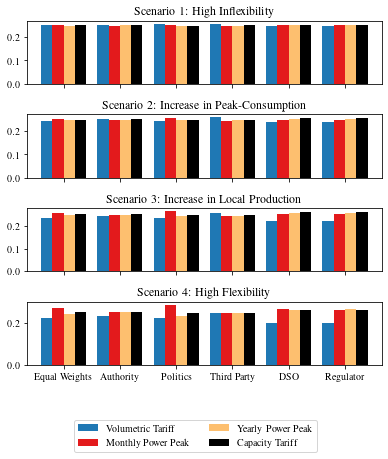

In [28]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[5], tmp[6], "k"]
fig, axes = plt.subplots(4, figsize=(5.5, 5.5))
for idx, ax in enumerate(axes):
    results[scenarios[idx]].plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names[scenarios[idx]])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-1.45))
#plt.savefig('results/plots/ranking.pdf', bbox_inches='tight')

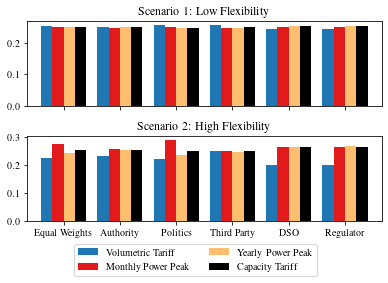

In [29]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[5], tmp[6], "k"]
fig, axes = plt.subplots(2, figsize=(5.5, 3.5))
for idx, scenario in enumerate(["Scenario 1", "Scenario 4"]):
    ax=axes[idx]
    results[scenario].plot.bar(color=colors, width=0.8, ax=ax)
    ax.legend().remove()
    if idx==1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    else:
        ax.set_xticklabels([])
    ax.set_title(scenario_names_reduced[scenario])
plt.tight_layout()
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.7))
plt.savefig('results/plots/ranking_reduced.pdf', bbox_inches='tight')